# Plotting densities against time

In [14]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import pandas as pd

mpl.style.use('report_style.mplstyle')

Parameters of the experiment

In [15]:
prop_committed = 0.03
beta_mod_rule = 'n_simple_scale'
beta_non_committed = 1
beta_committed = 1
ensemble_size = 1
run_length = 10**1
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

Run the ensemble experiments

In [16]:
for i in social_structures[:]:
    run_ensemble_experiment(prop_committed, beta_non_committed, beta_committed, ensemble_size, run_length, i, beta_mod_rule=beta_mod_rule)

100%|██████████| 1/1 [00:00<00:00, 70.25it/s]


30
12.995305164319248
5.853852030272097
<class 'list'>
<class 'list'>
<class 'list'>


100%|██████████| 1/1 [00:00<00:00, 69.37it/s]


32
11.789256198347108
5.5930343581151565
<class 'list'>
<class 'list'>
<class 'list'>


100%|██████████| 1/1 [00:00<00:00, 62.16it/s]


37
7.52020202020202
6.176044953877777
<class 'list'>
<class 'list'>
<class 'list'>


100%|██████████| 1/1 [00:00<00:00, 68.28it/s]

24
9.315950920245399
4.069359190148994
<class 'list'>
<class 'list'>
<class 'list'>


# Plotting

Plot results for ensemble experiment on linear time axis

loaded data


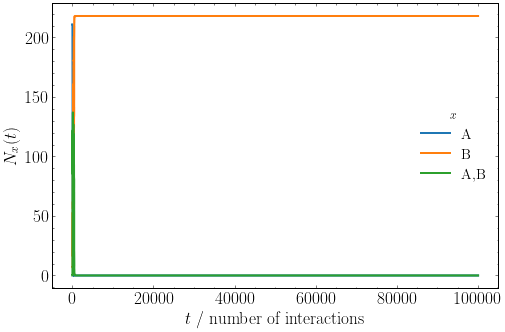

In [5]:
social_structure = 'LyonSchool'

fname = f'{social_structure}_{beta_mod_rule}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'

data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

print('loaded data')

A_data = data[0::3,:]
B_data = data[1::3,:]
AB_data = data[2::3,:]

A_data_av = np.median(A_data, axis=0)
A_data_25 = np.percentile(A_data, 25, axis=0)
A_data_75 = np.percentile(A_data, 75, axis=0)
B_data_av = np.median(B_data, axis=0)
B_data_25 = np.percentile(B_data, 25, axis=0)
B_data_75 = np.percentile(B_data, 75, axis=0)
AB_data_av = np.median(AB_data, axis=0)
AB_data_25 = np.percentile(AB_data, 25, axis=0)
AB_data_75 = np.percentile(AB_data, 75, axis=0)

t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

plt.figure(1)
plt.plot(t, A_data_av, color='tab:blue', label='A')
plt.fill_between(t, y1=A_data_25, y2=A_data_75, color='tab:blue', alpha=0.2)
plt.plot(t, B_data_av, color='tab:orange', label='B')
plt.fill_between(t, y1=B_data_25, y2=B_data_75, color='tab:orange', alpha=0.2)
plt.plot(t, AB_data_av, color='tab:green', label='A,B')
plt.fill_between(t, y1=AB_data_25, y2=AB_data_75, color='tab:green', alpha=0.2)
plt.legend(title=social_structure)
plt.xlabel(r'$t$ / number of interactions')
plt.ylabel(r'$N_{x}(t)$')
plt.legend(title=r'$x$')
plt.savefig(f'figures/{fname}_lintime.pdf')
plt.show()

Produces multiple logarithmic plots of individual ensemble experiments

In [23]:

for social_structure in social_structures[:]:
    fname = f'{social_structure}_{beta_mod_rule}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'

    data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

    print('loaded data')

    A_data = data[0::3,:]
    B_data = data[1::3,:]
    AB_data = data[2::3,:]

    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

    A_data = A_data/N
    B_data = B_data/N
    AB_data = AB_data/N

    A_data_av = np.median(A_data, axis=0)
    A_data_25 = np.percentile(A_data, 25, axis=0)
    A_data_75 = np.percentile(A_data, 75, axis=0)
    B_data_av = np.median(B_data, axis=0)
    B_data_25 = np.percentile(B_data, 25, axis=0)
    B_data_75 = np.percentile(B_data, 75, axis=0)
    AB_data_av = np.median(AB_data, axis=0)
    AB_data_25 = np.percentile(AB_data, 25, axis=0)
    AB_data_75 = np.percentile(AB_data, 75, axis=0)

    t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

    plt.figure()
    plt.plot(t, A_data_av, color='tab:blue', label='A')
    plt.fill_between(t, y1=A_data_25, y2=A_data_75, color='tab:blue', alpha=0.2)
    plt.plot(t, B_data_av, color='tab:orange', label='B')
    plt.fill_between(t, y1=B_data_25, y2=B_data_75, color='tab:orange', alpha=0.2)
    plt.plot(t, AB_data_av, color='tab:green', label='A,B')
    plt.fill_between(t, y1=AB_data_25, y2=AB_data_75, color='tab:green', alpha=0.2)
    plt.xscale('log')
    plt.title(r'$\beta$ modulation: ' + beta_mod_rule)
    plt.xlabel('$t$ / number of interactions')
    plt.ylabel(r'$N_{x}(t)$')
    plt.legend(title=r'$x$')
    plt.savefig(f'figures/{fname}_logtime.pdf')
    plt.show()

KeyboardInterrupt: 

Full reproduction of plots

loaded data
loaded data
loaded data
loaded data


/Users/tomcowperthwaite/opt/anaconda3/envs/complexityandnetworks/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/tomcowperthwaite/opt/anaconda3/envs/complexityandnetworks/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


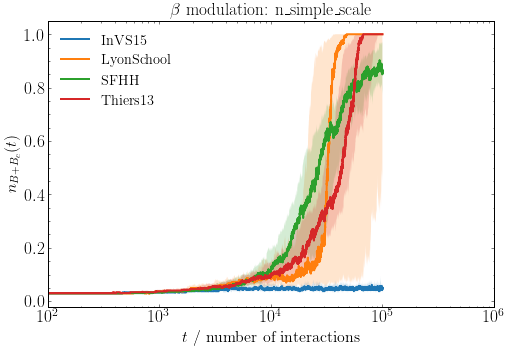

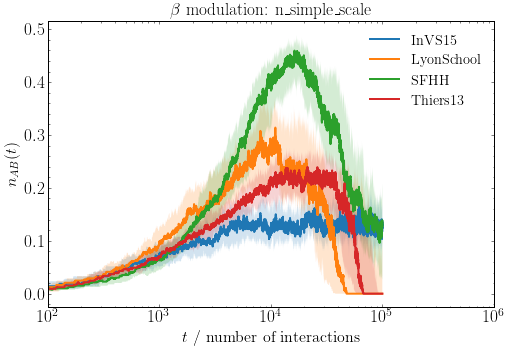

In [11]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)


for social_structure in social_structures:
    fname = f'{social_structure}_{beta_mod_rule}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
    data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

    print('loaded data')
    A_data = data[0::3,:]
    B_data = data[1::3,:]
    AB_data = data[2::3,:]

    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

    B_data = B_data/N
    AB_data = AB_data/N
    
    B_data_av = np.median(B_data, axis=0)
    B_data_25 = np.percentile(B_data, 25, axis=0)
    B_data_75 = np.percentile(B_data, 75, axis=0)
    AB_data_av = np.median(AB_data, axis=0)
    AB_data_25 = np.percentile(AB_data, 25, axis=0)
    AB_data_75 = np.percentile(AB_data, 75, axis=0)
    t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

    ax1.plot(t, B_data_av, label = social_structure)
    ax1.fill_between(t, y1=B_data_25, y2=B_data_75, alpha=0.2)

    ax1.set_xlabel('$t$ / number of interactions', fontsize=16)
    ax1.set_ylabel(r'$n_{B+B_c}(t)$', fontsize=16)


    ax2.plot(t, AB_data_av, label = social_structure)
    ax2.fill_between(t, y1=AB_data_25, y2=AB_data_75, alpha=0.2)

    ax2.set_xlabel('$t$ / number of interactions', fontsize=16)
    ax2.set_ylabel(r'$n_{AB}(t)$', fontsize=16)

fname = f'allstructures_{prop_committed}_{beta_mod_rule}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
ax1.legend()
ax1.set_title(r'$\beta$ modulation: ' + beta_mod_rule)
ax1.set_xscale('log')
ax1.set_xlim((1e2, 1e6))
fig1.savefig(f'figures/{fname}_B_logtime.pdf')
fig1.show()

ax2.legend()
ax2.set_xscale('log')
ax2.set_xlim((1e2, 1e6))
ax2.set_title(r'$\beta$ modulation: ' + beta_mod_rule)
fig2.savefig(f'figures/{fname}_AB_logtime.pdf')
fig2.show()

# for social_structure in social_structures:
#     fname = f'{social_structure}_{beta_mod_rule}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
#     data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

#     print('loaded data')
#     A_data = data[0::3,:]
#     B_data = data[1::3,:]
#     AB_data = data[2::3,:]

#     N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

    
    
    
#     t = np.linspace(0, run_length, num=run_length+1, endpoint=True)

    



# Plotting distributions of variables

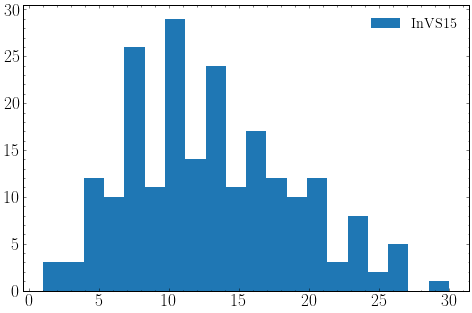

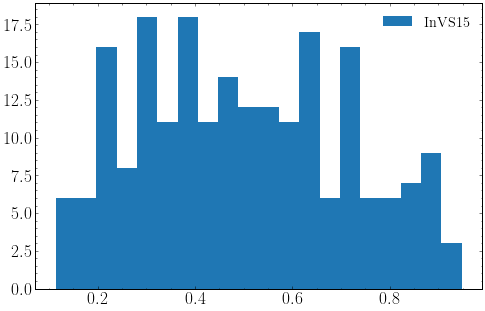

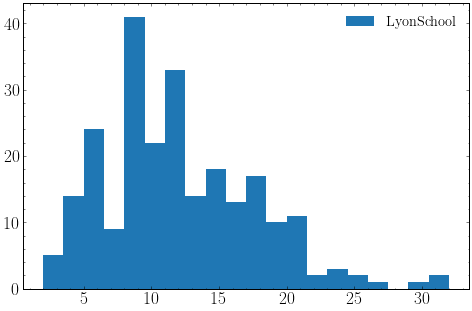

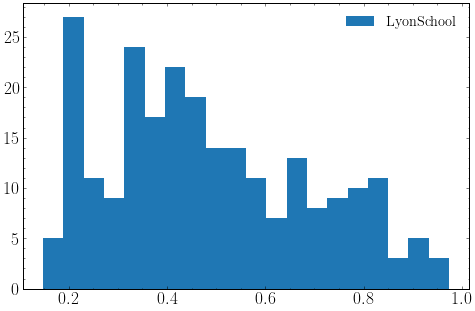

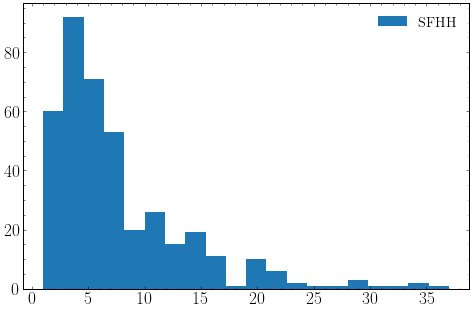

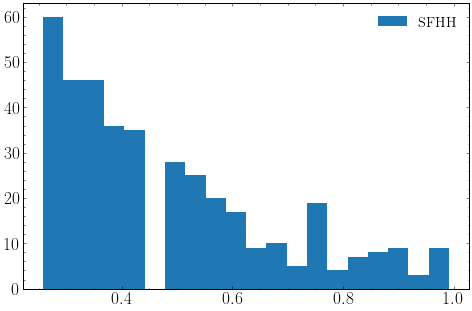

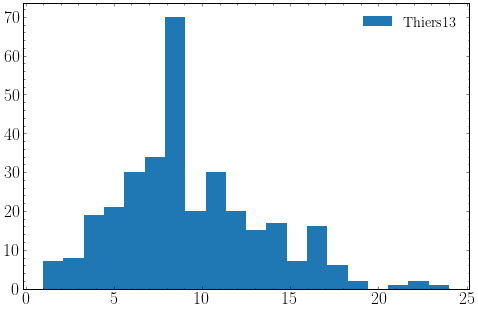

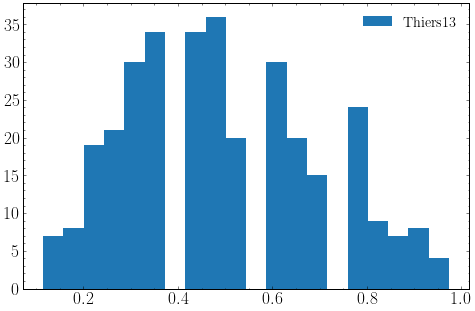

In [4]:
for social_structure in social_structures[:]:
    fname = f'{social_structure}_{beta_mod_rule}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
    data = pd.read_csv(f'aux_outputs/{fname}.csv', header=None)

    deg_list = data.iloc[0].to_list()
    deg_max = data.iloc[1].to_list()[0]
    beta_list = data.iloc[2].to_list()

    plt.figure()
    plt.hist(deg_list, label=social_structure, bins=20)
    plt.legend()
    plt.show()

    plt.figure()
    plt.hist(beta_list, label=social_structure, bins=20)
    plt.legend()
    plt.show()